# Assignment 1 - 657A

## Question 1

The assignment involves the implementation of classification algorithms on the iris dataset and its exploratory data analysis. The first step in data analysis is plotting it and understanding the dependency of variables on each other and its utility in predicting the outcome.

The pair plot basically represents the relationship of every variable with every other variable.

In [1]:
import seaborn as sns; 
iris = sns.load_dataset("iris")

The dataset of iris has been loaded from the seaborn library and stored in the iris variable. 'iris' now contains all the variable and target observations.

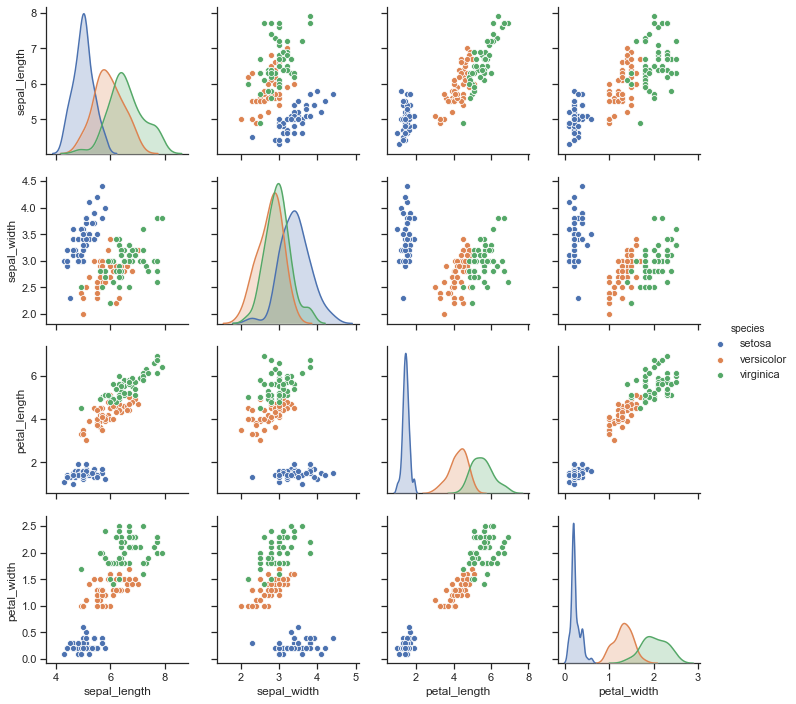

In [2]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris,hue="species")

The above graph represents the relationship between all the dependent variables with each other. The graph between same variable represents a density distribution(1-D) of the data whereas the graph between different variables represent the scatter plot(2-D) of data.

The three classes of flowers - setosa,versicolor and virginica have been represented by three different colors - blue,orange and green respectively

The relationship between same variables shows density distribution of data. The observations are as follows:
1.    sepal_length vs sepal_length: The datapoints for all the three species are overlapping therefore they cannot be distinguished. The datapoints for setosa show a maximum peak at sepal_length~5(as observed) which means flowers with sepal length 5 have higher chances of belonging to setosa than the other two(as observed from the graph). The datapoints for virginica and versicolor are more distributed over a certain range with almost similar data distribution. The points of overlapping between these two are a lot more, therefore it is difficult to distinguish between them. Virginica seems to have some outliers as observed from the graph which can be eliminated using confidence intervals
2.    sepal_width vs sepal_width: The datapoints for all the three species are overlapping therefore they are inseparable. Setosa and virginica seems to have some outliers as observed from the graph which can be eliminated using confidence intervals.
3.    petal_length vs petal_length: The datapoints for Setosa are completely separable from the other two species. The data for Setosa is concentrated between petal_length~ (0,2) (as observed). The data for versicolor and virginica is more distributed over the range and has some overlapping data. They can be distinguished to some extent with accuracy not 100%
4.    petal_width vs petal_width: The datapoints for Setosa are completely separable from the otehr two species. The data for Setosa is concentrated between petal_width~ (0,0.7) (as observed). The data for versicolor and virginica is more distributed over the range and has some overlapping data. They can be distinguished to some extent with accuracy not 100%

The relationship between different variables has been plotted using scatter graph.The observations are as follows:
1.    sepal_length vs sepal_width: The Setosa species is concentrated where sepal_length is the smallest and the sepal_width is the largest whereas the other two species are concentrated towards the center with a lot of overlapping. Using sepal_length and sepal_width, Setosa species can be separated to some extent but not completely(due to outliers) but the other two are inseparable. Therefore, these two parameters are not good parameters for separatibility.
2.    sepal_length vs petal_length and sepal_width vs petal_length: In these plots, petal_length is the distinguishing factor, given sepal_length and sepal_width. Using petal_length the species can be separated. Setosa is completely separable whereas the other two species might have certain amount of overlapping(inconsistency)
3.    sepal_length vs petal_width and sepal_width vs petal_width: In these plots, petal_width is the distinguishing factor, given sepal_length and sepal_width. Using petal_width the species can be separated. Setosa is completely separable whereas the other two species might have certain amount of overlapping(inconsistency)
4.    petal_length vs petal_width: In this plot,it can be observed that both the parameters are the deciding factors and can be used to distinguish between different species of flowers. Versicolor and virginica might have some amount of overlapping but can be distinguished using the two parameters together.

The observations can be concluded as follows:
1. sepal_length and sepal_width cannot be used to separate the species from each other
2. petal_length and petal_width can be the deciding parameters to distinguish amongst the three classes
3. From the graph it can be said that:
    a. if petal_length < = 2.1 and petal_width < = 0.7, then species = Setosa
    b. if 2.1 < petal_length < = 4.9 and 0.7 < petal_width < = 1.8, then species = Versicolor
    c. if petal_length > 4.9 and petal_width > 1.8, then species = virginica

These are just the inferences concluded from looking at tha pairplot.

The central tendencies and the general structure of the dataset can be observed using describe() and info() command.

In [3]:
iris.describe()
#The range is defined by the min and max value for each parameter

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()
#The structure of the data frame can be observed from here. 
#The total number of entries and its data type are defined for each variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Question 2

The dataset has 150 observations which has to be divided into three sets - train, validate and test. To do so, the dataset is divided into 2 groups of train_validate(80%) and test(20%). Later, the train_validate is further split into train(75%) and validation sets(25%).

The KNN model takes into consideration k nearest neighbours for each point to classify it into one of the defined groups. The class that has its maximum data elements near the point under consideration will have the point under its domain. To avoid tie, odd numbers are preferred. 

Greater the K smoother the boundry( removal of noise) but higher the chances of misclassification(underfitting). Lower value of K can have a lot of noise that will have higher influence on the dataset(overfitting). Both of these lead to lower accuracy on the validation/test data. Another factor is the computational complexity, which is lower for smaller value of k and higher for higher value of K. 

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
#importing libraries to be used for executing the KNN model

In [6]:
X, y = load_iris(return_X_y=True)
#X contains the variables (dependent) that define the properties of the flower(sepal length, sepal width, petal length, petal width)
#Y contains the classes of flowers(independent variable), the target data

The data has to be split into 3 sets with train set having 90 observations, validate set having 30 observations and test set having 30 observations.
To achieve this goal a split of 80,20 followed by 75,25 on the 80 set is executed.

In [7]:
X_train_validate,X_test,y_train_validate,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Train_test_split breaks the data set into training and test sets with test_size defining the size of the test set
#random state is used for obtaining the same split always for the test and trainig set

In [8]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train_validate,y_train_validate,test_size=0.25,random_state=42)

The Knn model is now trained using the trains set and tested on the test set. The accuracy score defines the correctness of the model.

In [85]:
knn_default_param=KNeighborsClassifier()
knn_default_param.fit(X_train,y_train)
y_predict_default_param  = knn_default_param.predict(X_test)
accuracy_default_param = metrics.accuracy_score(y_test,y_predict_default_param)
print("The test accuracy with default parameters is ",accuracy_default_param)

The test accuracy with default parameters is  0.9666666666666667


The reported accuracy for the model trained using the train set and default parameters is 96.67%

The model will now be trained using different k values and validated using the validation set to find out the best k value that will increase the accuracy of the model.

In [86]:
k_values=[1,5,10,15,20,25,30,35]
#K values define the number of nearest neighbors the model will take into consideration 
#when classifying the datapoint into one of the three species 
scores_knn={}
scores_list_knn=[]
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict  = knn.predict(X_validate)
    scores_knn[k] = metrics.accuracy_score(y_validate,y_predict)
    scores_list_knn.append(metrics.accuracy_score(y_validate,y_predict))
print("The accuracies obtained after tuning the model with different k values is as follows:")
print(scores_knn)

The accuracies obtained after tuning the model with different k values is as follows:
{1: 0.9, 5: 0.9333333333333333, 10: 0.9333333333333333, 15: 0.9333333333333333, 20: 0.9333333333333333, 25: 0.9666666666666667, 30: 0.9666666666666667, 35: 0.9333333333333333}


Now that the accuracies have been determined, the plot been k values and accuracies will show the trend

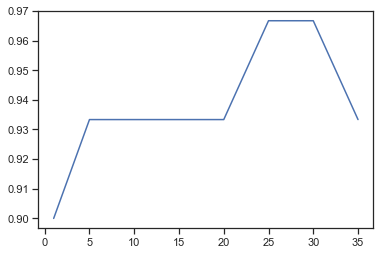

In [12]:
plt.plot(k_values,scores_list_knn)

The best K value is the one with highest accuracy which has been observed for k=[25,30] as depicted in the graph. As the value of K increases from 1, the accuracy of the model increases as well, as it removes the noise and it is observed to be the highest for 25 and 30. But for k=35, we observe that the accuracy again decreases. The reason for the same could be the underfitting of data which resulted in smoother decision boundry of the train model because of which there is a dip in the accuracy with increase in K.

Lower value of k results in overfitting of the model because it is highly prone to noisy data and has less number of data elements to compare the datapoint with to correctly classify it to the right right class( misclassification of the data). Higher value of k results in underfitting the model because it has way too many data elements to comapre the datapoint with that the distinction between the nearest and not so near elements becomes blurry. This will again result in misclassification of data and in many cases may output classes that have dominance in the dataset.

When choosing an optimal value of K, it should be larger enough to minimize the noise in the data and small enough to avoid misclassification of data. Since only one of the two has to be chosen, it will be k=25 based on the above statement. Also the computational complexity and time for classification for smaller k will be less as compared to the bigger value. K defines the number of neighbors it will compare before generating the result. Therefore smaller value will require lesser comparations and will result in similar accuracy as the larger value(30). Hence, K=25 is the best K value.

In [87]:
knn_test=KNeighborsClassifier(n_neighbors=25)
knn_test.fit(X_train,y_train)
y_predict = knn_test.predict(X_test)
scores_test = metrics.accuracy_score(y_test,y_predict)
print("The test accuracy with k=25 is ",scores_test)

The test accuracy with k=25 is  1.0


Now that the model is tested on the test set with the best K value, it can be observed that it yielded an accuracy of 100%.


## Question 3

The dataset has 150 observations which has to be divided into three sets - train, validate and test. To do so, the dataset is divided into 2 groups of train_validate(80%) and test(20%). Now the train_validate model will be executed using the cross validation method where the 80% of the train_validate data will be split into 10 sets in such a way that the model will be trained on 9 sets and validated using the last set. This process repeats 10 times such that each set is used as validation set once. To ensure that the same split takes place every time the model is executed, random_state is used.

SVM - Support Vector Machine tries to find a hyperplane that correctly classifies the data into one of the defined groups. The goal of SVM is to maximize the distance between the hyperplanes making sure that it does not misclassifiy the data.  C value is the regularization parameter that determines the distance between the hyperplanes. If the value of C is small, then the distance between the hyperplanes will be larger. This will result in underfitting of the data and it may misclassify some data. If the value of C is larger, then the distance between the hyperplanes will be smaller. This will result in overfitting of the data as it will try to accommodate as many class datapoints as it could to avoid misclassification. This will result in high training accuracy but lower test accuracy.

In [14]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
#importing libraries to be used for executing the SVM model

In [15]:
X, y = load_iris(return_X_y=True)
#X contains the variables (dependent) that define the properties of the flower(sepal length, sepal width, petal length, petal width)
#Y contains the classes of flowers(independent variable), the target data

In [16]:
X_train_validate,X_test,y_train_validate,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Train_test_split breaks the data set into training and test sets with test_size defining the size of teh test set
#random state is used for obtaining the same split always for the test and trainig set

The data has been split into 2 sets with train_validate set having 120 observations and test set having 30 observations.

The svm model is now validated using cross validation on the train_validation set. The accuracy score defines the correctness of the model.

In [17]:
c_values=[0.1,0.5,1,2,5,10,20,50]
#C values define the level of classification. Smaller value of c - underfit data, Higher value of c - overfit data.
# Underfit train set will yield lower accuracy 
#Overfit data will be accurate for the train set But will result in wrong output for the test data

In [88]:
scores_val=[]
score_list_val={}
for c in c_values:
    clf_val = svm.SVC(kernel='linear',C=c,random_state=42)
    score=cross_val_score(clf_val,X_train_validate,y_train_validate,cv=10)
    scores_val.append(score.mean())
    score_list_val[c] = score.mean()
print("The accuracies obtained after tuning the model with different c values is as follows:")
print(score_list_val)

The accuracies obtained after tuning the model with different c values is as follows:
{0.1: 0.9575757575757576, 0.5: 0.9666666666666666, 1: 0.9666666666666666, 2: 0.9666666666666668, 5: 0.9666666666666668, 10: 0.9666666666666668, 20: 0.9423076923076923, 50: 0.933974358974359}


Now that the accuracies have been determined, the plot been c values and accuracies will show the trend

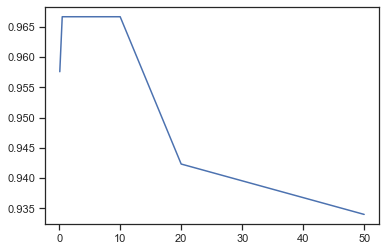

In [24]:
plt.plot(c_values,scores_val)

From the graph and the accuracy values it can be observed that the best values of c are 2,5,10. From the graph it can be observed that initially as the c value increases, the accuracy also increases. Once it reaches its maximum, beyond that point the accuracy starts decreasing with an increase in the value of c. This happens because initially the model underfits the data by misclassifying the data as small c results in larger distance between hyperplanes. Beyond 10, a dip in the accuarcy of the model is observed. This maybe because of overfitting the data. At greater value of C the model tries to accommodate as many datapoints into the correst class as possicle as a result of which the distance decreases and the model becomes misfit for the validation set. It gets influenced by the noise in the dataset and overfits it according to the training set.

The factors that determine which c value is the best are:
1. to have hyperplanes that do not misclassify the data
2. to have the largest minimum margin between hyperplanes

From these conditions, we can say that '2' best satisfies the purpose of the model as it would have similar misclassification as 5 and 10 and will have larger margin between the hyperplanes as compared to 5 and 10.

In [89]:
clf_test = svm.SVC(kernel='linear',C=c,random_state=42)
clf_test.fit(X_train_validate,y_train_validate)
score_list_test = clf_test.score(X_test,y_test)
print("The test accuracy of the model is ",score_list_test)

The test accuracy of the model is  1.0


Best accuracy is reported for 2 which is 100%

## Question 4

The dataset has 150 observations which has to be divided into three sets - train, validate and test. To do so, the dataset is divided into 2 groups of train_validate(80%) and test(20%). Now the train_validate model will be executed using the cross validation method where the 80% of the train_validate data will be split into 10 sets in such a way that the model will be trained on 9 sets and validated using the last set. This process repeats 10 times such that each set is used as validation set once. To ensure that the same split takes place every time the model is executed, random_state is used.

### Decision Tree

Decision Tree classifier classifies the data into groups of data that can be categorised later. This model helps in finding patterns in data and categorizing them into leaves of different classes. The leaf branches define the properties that lead to the categorization. 

The decision tree model is very easy to overfit. As the depth of the tree increases, the patterns are further disintegrated into subsets which might work well for the train model but misclassify the validation/test model. More depth makes the model more prone to noise and hence the model becomes overfit. Extremely small values result in underfitting as well as it is unable to break down the model into desired number of classes.

In [90]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import pandas as pd

In [25]:
max_depth=[3,5,10,None]
#Max depth is the number of levels the tree braeks down to.
#None is the default value for the model

In [26]:
X, y = load_iris(return_X_y=True)
#X contains the variables (dependent) that define the properties of the flower(sepal length, sepal width, petal length, petal width)
#Y contains the classes of flowers(independent variable), the target data
X_train_validate,X_test,y_train_validate,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#Train_test_split breaks the data set into training and test sets with test_size defining the size of teh test set
#random state is used for obtaining the same split always for the test and trainig set

The data has been split into 2 sets with train_validate set having 120 observations and test set having 30 observations.

The decision tree model is now validated using cross validation on the train_validation set. The accuracy score defines the correctness of the model.

In [91]:
scores_decision_tree_val=[]
score_decision_tree_val={}
for m in max_depth:
    clf_decision_tree_val = DecisionTreeClassifier(max_depth=m,random_state=42)
    score = cross_val_score(clf_decision_tree_val, X_train_validate,y_train_validate, cv=10)
    scores_decision_tree_val.append(score.mean())
    score_decision_tree_val[m] = score.mean()
print("The accuracies obtained after tuning the model with different max_depths is as follows:")
print(score_decision_tree_val)

The accuracies obtained after tuning the model with different max_depths is as follows:
{3: 0.9332167832167831, 5: 0.908216783216783, 10: 0.9248834498834497, None: 0.9248834498834497}


Now that the accuracies have been determined, the plot been max_depth and accuracies will show the trend

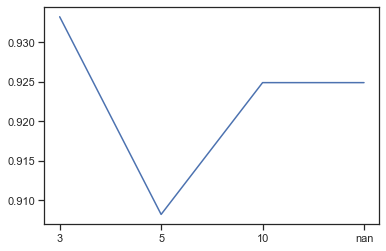

In [46]:
plt.plot(['3','5','10','nan'],scores_decision_tree_val)

From the graph, it can be observed that the maximum accuracy is obtained at the max depth of 3. Beyond that point the accuracy decreases. The reason for the same could be the overfitting of the data. Deeper trees result in misclassification for validation set.

In [92]:
clfTest = DecisionTreeClassifier(max_depth=3,random_state=42)
clfTest.fit(X_train_validate,y_train_validate)
print("The test accuracy for the model is ",clfTest.score(X_test,y_test))

The test accuracy for the model is  1.0


Now that the model is tested on the test set with the best max_depth, it can be observed that it yielded an accuracy of 100%.

### Random Forest

Random forest is an ensemble method that creates multiple trees for the same dataset. When data has to be predicted, the outcomes from all the trees is calculated and the mode of all results is given as an output. The two parameters that affect the performance of the model are the number of trees and the maximum depth.

For the depth of the tree, as it increases, the patterns/datasets are further disintegrated into subsets which might work well for the train model but misclassify the validation/test model. More depth makes the model more prone to noise and hence the model becomes overfit. Extremely small values result in underfitting as well as it is unable to break down the model into desired number of classes.

For the number of trees, as they increase, the model performs better. But at certain point the performance becomes constant that is as the trees increase, the performance remains the same but the computational cost increases. At that point, adding more trees becomes a limiting factor. If the dataset has noise then the chances of model to overfit the train set also increase( mostly results due to higher depth of the tree)

In [32]:
n_estimators = [5,10,50,150,200]
#n_estimators are the number of trees that the model can built to compare the results with

Since the model has been split into train_validate and test sets in the above stage, therefore, it will not be repeated again(to reduce the computational cost)

In [93]:
scores_random_forest_val=[]
score_random_forest_val={}
for n in n_estimators:
    for m in max_depth:
        clf_random_forest_val=RandomForestClassifier(max_depth=m,n_estimators=n,random_state=42)
        score=cross_val_score(clf_random_forest_val,X_train_validate,y_train_validate,cv=10)
        scores_random_forest_val.append(score.mean())
        score_random_forest_val[m,n]=score.mean()
print("The accuracies obtained after tuning the model with different max_depths and n_estimators are as follows:")
print(score_random_forest_val)

The accuracies obtained after tuning the model with different max_depths and n_estimators are as follows:
{(3, 5): 0.9248834498834497, (5, 5): 0.9248834498834497, (10, 5): 0.9248834498834497, (None, 5): 0.9248834498834497, (3, 10): 0.9332167832167831, (5, 10): 0.9248834498834497, (10, 10): 0.9248834498834497, (None, 10): 0.9248834498834497, (3, 50): 0.9415501165501163, (5, 50): 0.9415501165501163, (10, 50): 0.9332167832167831, (None, 50): 0.9332167832167831, (3, 150): 0.9415501165501163, (5, 150): 0.9332167832167831, (10, 150): 0.9248834498834497, (None, 150): 0.9248834498834497, (3, 200): 0.9415501165501163, (5, 200): 0.9332167832167831, (10, 200): 0.9332167832167831, (None, 200): 0.9332167832167831}


Now that the accuracies have been determined, a heat plot been max_depth, n_estimators and accuracies will show the trend

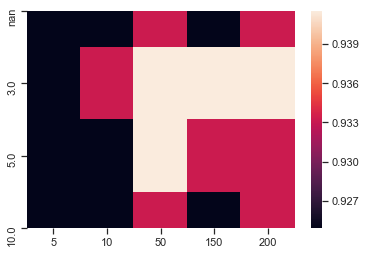

In [81]:
import pandas as pd
ser = pd.Series(list(score_random_forest_val.values()),
                  index=pd.MultiIndex.from_tuples(score_random_forest_val.keys()))
df = ser.unstack().fillna(0)
df.shape
sns.heatmap(df);

From the graph we can observe that the maximum accuracy has been observed for depth = 3 and corresponding number of trees = (50,150,200) and depth=5 and number of trees=50.

For each value of depth, we can observe that as the number of trees increase, the accuracy increases as well, with a few uncertainities in some cases. These are due to some noisy data in the dataset which result in an error in the accuracy.
For each value of number of trees, the accuracy decreases with an increase in the depth of the tree. This is due to overfitting of the data.
From the above statements, we can say that increase in depth decreases accuracy and for same accuarcy increase in depth will result in more computational cost. Therefore out 3 and 5, 3 is the best depth parameter. Given 3, the numer of trees that can be used to improve the test results are 50,150 and 200. As we see, with an increase in the number of trees, the accuracy still remains the same. Therefore, the maximum value that will affect the performance of the model is 50. Increasing beyond that value will have no affect on the validation set.

Hence 3, 50 are the best parameters for max_depth and n_estimators.

In [94]:
clfTest = RandomForestClassifier(max_depth=3,n_estimators = 50,random_state=42)
clfTest.fit(X_train_validate,y_train_validate)
test_values = clfTest.score(X_test,y_test)
print("The test accuracy of the model is ",test_values)

The test accuracy of the model is  1.0


Now that the model is tested on the test set with the best max_depth and number of trees, it can be observed that it yielded an accuracy of 100%.

### Gradient Tree Boosting

Gradient tree boosting involves the process of improving the performance of the model by fiting the new tree on the old one. It updates the tree to make it more effective and accurate. This model is usually prone to overfitting if the number of trees are very larger. For smaller values, as the trees increase, the accuracy improves as well but beyond certain value it starts getting influenced by the noisy data and we observe a dip in the performance.

Since the model has been split into train_validate and test sets in the above stage, therefore, it will not be repeated again(to reduce the computational cost)


In [95]:
scores_gradient_boosting=[]
score_gradient_boosting={}
for n in n_estimators:
    clf = GradientBoostingClassifier(n_estimators=n,random_state=42)
    score=cross_val_score(clf,X_train_validate,y_train_validate,cv=10)
    scores_gradient_boosting.append(score.mean())
    score_gradient_boosting[n]=score.mean()
print("The accuracies obtained after tuning the model with different n_estimators are as follows:")
print(score_gradient_boosting)

The accuracies obtained after tuning the model with different n_estimators are as follows:
{5: 0.9325757575757574, 10: 0.9325757575757574, 50: 0.9248834498834497, 150: 0.9165501165501164, 200: 0.9165501165501164}


Now that the accuracies have been determined, a plot been n_estimators and accuracies will show the trend

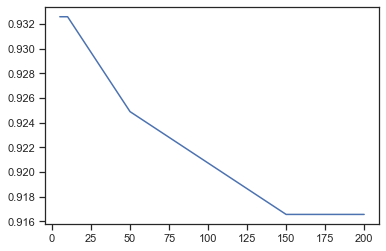

In [44]:
plt.plot(n_estimators,scores_gradient_boosting)

From the graph it can be observed that the maximum accuracy has been obtained for values 5 and 10. After that we observe that the accuracy decreases with an increase in the number of trees. The reason for the same is overfitting the data and the influence of the noisy data on the model which resulted in misclassification of the data into groups.

The key behind choosing optimal number of trees is to pick a maximum beyond which no improvement can be observed. From 5 and 10, 5 is the value beyond which no improvment in the performance of the model can be observed. Hence 5 is the best parameter.

In [96]:
clfTest = GradientBoostingClassifier(n_estimators = 5,random_state=42)
clfTest.fit(X_train_validate,y_train_validate)
test_data = (clfTest.score(X_test,y_test))
print("The test accuracy for the model is ",test_data)

The test accuracy for the model is  1.0


Now that the model is tested on the test set with the best number of trees, it can be observed that it yielded an accuracy of 100%.

# Question 5

1.
The dataset available to the learning model has inputs and its corresponding outputs. 

Before the model is set out to predict the values for unkwown data, it has to be ensured that the model is working correctly for the known data. If it wrongly classifies the dataset, then the chances of it predicting incorrect outputs for unknown values is pretty high. This is known as underfitting.

There could also be cases where the model works just fine for the dataset available but predicts wrong outputs for the unknown data. Such cases fail to generalize the dataset for unknown values and adjusts its values just according to the data available. Therefore, the model trained will have high influence of noise on it. This is known as overfitting.

To overcome these two cases, we divide the dataset into train set and test test. Usually the model is trained on a major section of the data and tested on the rest of it. Splitting the data into train and test sets helps in evaluating the model better. Since the outcomes are known for the test set as well, it becomes easier to evaluate the accuracy of the model and analyze how well it performs for the unseen data. The chances of the model to predict the outcomes for unknown data with the similar accuracy can be ensured.

2.The KNN model takes into consideration k nearest neighbours for each point to classify it into one of the defined groups.

Validation set is a dataset that grows out of the train set and is used by the model to evaluate which hyperparameter tunes the best with the trained model. Given a set of values for the parameters that you believe could perform well on the model are validated using the validation set on the train model. Of these values, the one with which we obtain the best results is then tested on the test set.

If we test directly on the test set and the accuracy obtained is lower than the expectation, in that case, we will try to tune the parameters based on the accuracy to be obtained for the test set. Which means the results obtained after this process will be biased for this test set because the model had seen this data and was modified accordingly.

To prevent biased results, validation set is used by the model to fine tune the hyperparameters and choose the ones that quantifies the performance of the model to its maximum. Once decided, the test set then gives the unbiased result of how the hyperparameters would predict the results for the inputs whose outcomes are unknown.

Validation set experiments with multiple values and returns the best one and test set gives a demo of how the best value will perform on the actual data inputed for prediction.

3.The KNN model takes into consideration k nearest neighbours for each point to classify it into one of the defined groups. The point belongs to the class that has its maximum data elements near the point under consideration. To avoid tie, odd numbers are preferred.

Greater the K smoother the boundry( removal of noise) but higher the chances of misclassification(underfitting). Lower value of K can have a lot of noise that will have higher influence on the dataset(overfitting). Both of these lead to lower accuracy on the validation/test data. Another factor is the computational power, which is lower for smaller value of k and higher for higher value of K.

The best K value is the one with highest accuracy which was been observed for k=[25,30]. As the value of K increases from 1 to 20, the accuracy of the model increases as well because the model removes the noise. At 25 and 30, it becomes maximum for both the k values. But for k=35, we observe that the accuracy again decreases. The reason for the same could be the underfitting of data which resulted in smoother decision boundry of the train model because of which there is a dip in the accuracy with increase in K.

Lower value of k results in overfitting of the model because it is highly prone to noisy data and has less number of data elements to compare the datapoint with to correctly classify it to the right right class( misclassification of the data). Higher value of k results in underfitting the model because it has way too many data elements to comapre the datapoint with that the distinction between the nearest and not so near elements becomes blurry. This will again result in misclassification of data and in many cases may output classes that have dominance in the dataset.

When choosing an optimal value of K, it should be larger enough to minimize the noise in the data and small enough to avoid misclassification of data. Since only one of the two has to be chosen, it will be k=25 based on the above statement. Also the computational time for classification for smaller k will be less as compared to the bigger value. K defines the number of neighbors it will compare before generating the result. Therefore smaller value will require lesser comparations and will result in similar accuracy as the larger value.

4.
1. Decision Tree classifier classifies the data into groups of data that can be categorised later. This model helps in finding patterns in data and categorizing them into leaves of different classes. The leaf branches define the properties that lead to the categorization.

2. Random forest is an ensemble method that creates multiple trees for the same dataset. When data has to be predicted, the outcomes from all the trees is calculated and the mode of all results is given as an output.

The learning models are very easy to overfit. As the depth of the tree increases, the patterns are further disintegrated into subsets which might work well for the train model but misclassify the validation/test model. More depth makes the model more prone to noise and hence the model becomes overfit. Extremely small values result in underfitting as it is unable to break down the model into desired number of classes.

For decision tree there is only one tree whereas for Random forest there are many trees with same maximum depth.

As observed for decision tree, as the value of max_depth increases, the accuracy of the model starts decreasing. This is due to overfitting of the data on the model. The model becomes more sensitive to noise as the depth of tree increases which leads to misclassification and hence lower accuracy on the data.

For random forest tree, it was observed that for all the trees, the accuracy decreases with an increase in the depth of the tree. This is due to overfitting of the data as a result of which the model fails to generalize the predictions for the unseen data.

The best value is the one beyond which the accuracy of the model stops increasing.

5.Gradient tree boosting involves the process of improving the performance of the model by fiting the new tree on the old one. It updates the tree to make it more effective and accurate. This model is usually prone to overfitting if the number of estimators are very larger. For smaller values, as the trees increase, the accuracy improves as well but beyond certain value it starts getting influenced by the noisy data and we observe a dip in the performance.

As observed, the maximum accuracy was obtained for values 5 and 10. After that we observe that the accuracy decreases with an increase in the number of trees. The reason for the same is overfitting the data and the influence of the noisy data on the model which resulted in misclassification of the data into groups.

The key behind choosing optimal number of trees is to pick a maximum beyond which no improvement can be observed.

In Random Forest, for each value of depth, we can observe that as the number of trees increase, the accuracy increases as well, with a few uncertainities in some cases. These are due to some noisy data in the dataset which result in an error in the accuracy.

As the trees increase, the model performs better. But at certain point the performance becomes constant that is as the trees increase, the performance remains the same but the computational cost increases. At that point, adding more trees becomes a limiting factor. If the dataset has noise then the chances of model to overfit the train set also increase( mostly results due to higher depth of the tree) which may result in a dip in the accuarcy.

{5: 0.9248834498834497, 10: 0.9248834498834497, 50: 0.9332167832167831, 150: 0.9248834498834497, 200: 0.9332167832167831}
{5: 0.9325757575757574, 10: 0.9325757575757574, 50: 0.9248834498834497, 150: 0.9165501165501164, 200: 0.9165501165501164}


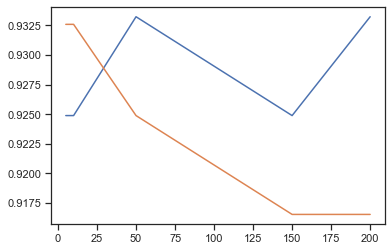

In [97]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
n_o_t=[5,10,50,150,200]

X, y = load_iris(return_X_y=True)
X_train_validate,X_test,y_train_validate,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

scores2=[]
score_random_boosting={}
for n in n_o_t:
    clf2 = RandomForestClassifier(n_estimators=n,random_state=42)
    score=cross_val_score(clf2,X_train_validate,y_train_validate,cv=10)
    scores2.append(score.mean())
    score_random_boosting[n]=score.mean()
print(score_random_boosting)
plt.plot(n_o_t,scores2)

scores2=[]
score_gradient_boosting={}
for n in n_o_t:
    clf2 = GradientBoostingClassifier(n_estimators=n,random_state=42)
    score=cross_val_score(clf2,X_train_validate,y_train_validate,cv=10)
    scores2.append(score.mean())
    score_gradient_boosting[n]=score.mean()
print(score_gradient_boosting)
plt.plot(n_o_t,scores2)

It can be observed from the above graph that as the number of trees increase beyond the maximum point, the accuarcy starts dropping due to overfiiting of the model. The highest accuracy for gradient boosting is greater than highest accuracy for random forest. Gradient boosting reaches maximum at less number of trees(5) whereas random forest reaches maximum at more number of trees(50). This means that random forest will need more number of trees to raech the same accuracy as gradient tree boosting. Requiring less number of trees also reduces the computational complexity of the model.

6.
SVM - Support Vector Machine tries to find a hyperplane that correctly classifies the data into one of the defined groups. The goal of SVM is to maximize the distance between the hyperplanes making sure that it does not misclassifiy the data.  C value is the regularization parameter that determines the distance between the hyperplanes. If the value of C is small, then the distance between the hyperplanes will be larger. This will result in underfitting of the data and it may misclassify some data. If the value of C is larger, then the distance between the hyperplanes will be smaller. This will result in overfitting of the data as it will try to accommodate as many class datapoints as it could to avoid misclassification. This will result in high training accuracy but lower test accuracy.

From the model it was observed that the best values of c are 2,5,10. Initially as the c value increases, the accuracy also increases. Once it reaches its maximum, beyond that point the accuracy starts decreasing with an increase in the value of c. This happens because initially the model underfits the data by misclassifying the data as small c results in larger distance between hyperplanes. Beyond 10, a dip in the accuarcy of the model is observed. This maybe because of overfitting the data. At greater value of C the model tries to accommodate as many datapoints into the correst class as possicle as a result of which the distance decreases and the model becomes misfit for the validation set. It gets influenced by the noise in the dataset and overfits it according to the training set.

The factors that determine which c value is the best are:

1. to have hyperplanes that do not misclassify the data
2. to have the largest minimum margin between hyperplanes

From these conditions, we can say that '2' best satisfies the purpose of the model as it would have similar misclassification as 5 and 10 and will have larger margin between the hyperplanes as compared to 5 and 10.